# SONM active deal analyzer

## This notebook is to analyze active deals on the SONM platform in real-time.

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import datetime


In [4]:
pd.Timestamp.now()

Timestamp('2018-09-06 20:59:19.845284')

In [5]:
from matplotlib import pyplot as plt

### ipython magic to plot in a notebook

In [6]:
%matplotlib inline

### SONM's DWH spits out API information of active deals.  Using Jupyter's magic to run BASH command to save the API data to livedeal.txt

In [7]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":1}' > livedeal.txt

In [8]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":2}' > history.txt

In [9]:
!curl -s https://dwh.livenet.sonm.com:15022/DWHServer/GetDeals/ -d '{"status":0}' > all.txt

### Open the saved text in Jupyter

In [10]:
f = open('all.txt','r')

### Convert opened file to Pandas dataframe.

In [11]:
k = f.readlines()

In [12]:
r = k[0].split(',')

In [13]:
headposition = []
i = 0
for item in r:
    if 'deal' in item:

        headposition.append(i)
    i = i+1

In [14]:
testlist = []
for i in range(len(headposition)):
    if headposition[i]>0:
        #print(int(headposition[i-1])-int(headposition[i]))
        # Selecting only spot deals
        if (int(headposition[i-1])-int(headposition[i])) == -30:
        #print(r[headposition[i-1] : headposition[i]])
        #print(int([headposition[i-1]])-int([headposition[i]]))
            testlist.append(r[headposition[i-1] : headposition[i]])

In [15]:
df = pd.DataFrame(testlist)

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""endTime"":""2018-08-21T19:39:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG..."
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""endTime"":""2018-07-09T23:17:37Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT..."
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""endTime"":""2018-06-30T12:34:19Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT..."
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""endTime"":""2018-08-17T03:26:26Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""endTime"":""2018-08-19T02:57:53Z""","""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND..."


In [17]:
df.shape

(5821, 30)

## Data Cleaning

### The 14 column contains consumer ID.  First clean this colum.

In [18]:
df[14]

0       "consumerID":"0x4e452D1EB085A15d3f9544Ffedf9F8...
1       "consumerID":"0x18CB84498d67635F14BA20A7A5DD9F...
2       "consumerID":"0x517648Ec2E592969Ec344642034F07...
3       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
4       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
5       "consumerID":"0x517648Ec2E592969Ec344642034F07...
6       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
7       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
8       "consumerID":"0x417c92FbD944b125A578848DE44a4F...
9       "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
10      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
11      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
12      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
13      "consumerID":"0x1124fCC307756f4077c5e8E09b948C...
14      "consumerID":"0x73208ae757b5a5747d79da4a08ba4F...
15      "consumerID":"0xcB9Bb24E33A4F0f482f7060e6D4a4C...
16      "consumerID":"0x417c92FbD944b125A578848DE44a4F...
17      "consu

### Make a little funtion to trim unnecessary charactors

In [19]:
def Supplier_ID_conversion(content):
    return content[14:-1]

###  And applyt to pandas data frame.  New column called consumer_ID is generated.

In [20]:
df['consumer_ID'] = df[14].apply(Supplier_ID_conversion)

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,consumer_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""4339574211030764""","""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2206734024270600""","""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""2064655339296484310""","""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""130123572271057257""","""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""status"":2","""blockedBalance"":""0""","""totalPayout"":""11291858188194541""","""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911


## supplier

###  Same trick for the supplier ID.  The 13 column contains supplier ID information.  Clean with the same function.

In [22]:
df[13]

0       "supplierID":"0xdEE7E9955b8e462bD661c692cd703F...
1       "supplierID":"0xE0babb8aB2cE8845B68e32a87d3352...
2       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
3       "supplierID":"0x26200241593722FA17DE5722Ed66d8...
4       "supplierID":"0x1E575FB7dD8b28CEcAD9065A7aFD1a...
5       "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
6       "supplierID":"0xEBB9099c31EF1C72a2E597cD4c0205...
7       "supplierID":"0x2f90D7A115cFAf62ea05eDF0E5C7E9...
8       "supplierID":"0x734C2a165e57496169aAAEA6E22aE7...
9       "supplierID":"0x20bab6140Ec5fA53b5bEd974A1Ab99...
10      "supplierID":"0x26200241593722FA17DE5722Ed66d8...
11      "supplierID":"0x8D94E5A8B1F48268b389147FCd13B1...
12      "supplierID":"0xd0f1C2dafde206D97e37325f1d3104...
13      "supplierID":"0x10b8A639FB9c5D09c6b50B3Db27e63...
14      "supplierID":"0x2EeD5380B2eC7A88A99F8aE8179C04...
15      "supplierID":"0xfb2c6c866e1022C94377Dc4f31E1aa...
16      "supplierID":"0xd8B606a3D19C53E6Eea84ca5738D7D...
17      "suppl

In [23]:
df['supplier_ID'] = df[13].apply(Supplier_ID_conversion)

### Price

### Price value is shown as USD/s, so conver it to USD/h

In [24]:
unit = 10.0**18.0

4830442500000/unit * 60 *60

In [25]:
def Price_conversion(content):
    if 'price' in content:
        return float(content[9:-1])/unit * 60 *60
    if 'duration' in content:
        return float(content[11:-1])/unit * 60 * 60

In [26]:
df['price_USD/h'] = df[18].apply(Price_conversion)

###  ETH has rate

### The 10 column contains Ethash value.  Clean and convert to Mh/s.

In [27]:
df[10]

0               0
1        31458000
2        79806000
3        93131000
4        21959000
5        79806000
6        13125000
7        26543000
8        19778000
9        27518000
10       46570000
11       19441000
12       19934000
13       27459000
14              0
15              0
16      159643000
17       27470000
18       43417000
19              0
20              0
21       27470000
22       24722000
23              0
24       27470000
25      199602000
26       64894000
27       27470000
28       27470000
29      129853000
          ...    
5791    172031000
5792    186283000
5793     19874000
5794            0
5795            0
5796     22428000
5797            0
5798            0
5799            0
5800     21959000
5801     19778000
5802            0
5803    160329000
5804    106432000
5805     12386000
5806     53897000
5807    107041000
5808     53288000
5809    160329000
5810     21959000
5811    172031000
5812    160329000
5813     80094000
5814     12386000
5815     8

In [28]:
float(df[10][0])/1000000

0.0

In [29]:
def Ethash_conversion(content):
    return float(content)/1000000

In [30]:
Ethash_conversion(df[10][0])

0.0

In [31]:
df['Ethash'] = df[10].apply(Ethash_conversion)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""lastBillTS"":""2018-08-21T19:39:19Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""lastBillTS"":""2018-07-09T23:17:37Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""lastBillTS"":""2018-06-30T12:34:19Z""}","""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""lastBillTS"":""2018-08-17T03:26:26Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""lastBillTS"":""2018-08-19T02:57:53Z""}","""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959


# deal ID


In [33]:
df[0]

0       {"deals":[{"deal":{"id":"4698"
1                  {"deal":{"id":"720"
2                    {"deal":{"id":"2"
3                 {"deal":{"id":"3963"
4                 {"deal":{"id":"4342"
5                    {"deal":{"id":"5"
6                    {"deal":{"id":"4"
7                    {"deal":{"id":"3"
8                 {"deal":{"id":"3891"
9                    {"deal":{"id":"9"
10                {"deal":{"id":"1190"
11                {"deal":{"id":"1392"
12                   {"deal":{"id":"7"
13                   {"deal":{"id":"8"
14                {"deal":{"id":"1381"
15                {"deal":{"id":"3624"
16                {"deal":{"id":"4704"
17                  {"deal":{"id":"14"
18                {"deal":{"id":"2218"
19                {"deal":{"id":"2279"
20                {"deal":{"id":"5531"
21                  {"deal":{"id":"12"
22                  {"deal":{"id":"15"
23                 {"deal":{"id":"455"
24                  {"deal":{"id":"16"
25                {"deal"

In [34]:
df[0][1]

'{"deal":{"id":"720"'

In [35]:
df[0][1].index('"')

1

In [36]:
df[0][1].find('"')

1

In [37]:
df[0][1][:-1].rfind('"')

14

In [38]:
x = 1

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'720'

In [39]:
x = 0

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'4698'

In [40]:
x = 5258

df[0][x][df[0][x][:-1].rfind('"')+1:-1]

'2110'

In [41]:
def convert_deal_ID(content):
    return int(content[content[:-1].rfind('"')+1:-1])

In [42]:
convert_deal_ID(df[0][1])

720

In [43]:
df['deal_ID'] = df[0].apply(convert_deal_ID)

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""netflags"":3","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""netflags"":2","""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342


# master node

In [45]:
df[15]

0       "masterID":"0x24E192b02d33501f225580d6B19A8d97...
1       "masterID":"0x24ceb5Ec6D7C58bD519974A6Ba76F50c...
2       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
3       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
4       "masterID":"0xAAA932d77935EE3d8E0Ba1d464CFDA4E...
5       "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
6       "masterID":"0xd0ecfF77c5B50BAB4D865CB1254A14dd...
7       "masterID":"0x517648Ec2E592969Ec344642034F079c...
8       "masterID":"0x6F6B9a47668D96b3758D79c67c30A290...
9       "masterID":"0xf5291bFDAA9324c42BEf942eCfC971EB...
10      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
11      "masterID":"0x63dA2009Ff928f99D960F48CBDd76C5a...
12      "masterID":"0xedB7Ae4B946Cf249349974A02e354B5F...
13      "masterID":"0xb3A8866183ca88ED3c233337C4f85045...
14      "masterID":"0xA48Dded52080d6a729E0CCbcb0f45bD7...
15      "masterID":"0xE9a8A72Ea514D70479c0db2E971355D4...
16      "masterID":"0x416Af57F633e292b25976573a460d7C3...
17      "maste

In [46]:
df[15][0]

'"masterID":"0x24E192b02d33501f225580d6B19A8d97C5190D45"'

In [47]:
df[15][0][12:-1]

'0x24E192b02d33501f225580d6B19A8d97C5190D45'

In [48]:
def Master_ID_conversion(content):
    return content[12:-1]

In [49]:
df['master_ID'] =  df[15].apply(Master_ID_conversion)

In [50]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""askIdentityLevel"":1","""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01


# time stamp

# start time

In [51]:
df[19]

0       "startTime":"2018-08-21T17:25:49Z"
1       "startTime":"2018-07-09T23:16:40Z"
2       "startTime":"2018-06-30T09:15:34Z"
3       "startTime":"2018-08-17T03:21:17Z"
4       "startTime":"2018-08-19T02:56:02Z"
5       "startTime":"2018-06-30T12:34:46Z"
6       "startTime":"2018-06-30T12:31:01Z"
7       "startTime":"2018-06-30T12:23:37Z"
8       "startTime":"2018-08-16T01:02:14Z"
9       "startTime":"2018-06-30T13:07:55Z"
10      "startTime":"2018-07-10T22:31:52Z"
11      "startTime":"2018-07-12T16:32:58Z"
12      "startTime":"2018-06-30T12:48:37Z"
13      "startTime":"2018-06-30T12:53:04Z"
14      "startTime":"2018-07-12T09:05:46Z"
15      "startTime":"2018-08-15T16:35:43Z"
16      "startTime":"2018-08-21T21:22:34Z"
17      "startTime":"2018-06-30T13:27:58Z"
18      "startTime":"2018-07-24T15:23:46Z"
19      "startTime":"2018-07-26T11:28:19Z"
20      "startTime":"2018-08-29T23:36:41Z"
21      "startTime":"2018-06-30T13:17:16Z"
22      "startTime":"2018-06-30T14:00:13Z"
23      "st

In [52]:
df[19][0]

'"startTime":"2018-08-21T17:25:49Z"'

In [53]:
df[19][0][12:]

'"2018-08-21T17:25:49Z"'

In [54]:
pd.to_datetime("2018-07-24T13:37:46Z")

Timestamp('2018-07-24 13:37:46')

In [55]:
pd.to_datetime(df[19][0][13:-1])

Timestamp('2018-08-21 17:25:49')

In [56]:
def convert_starttime(content):
    return pd.to_datetime(content[13:-1])

In [57]:
convert_starttime(df[19][4])

Timestamp('2018-08-19 02:56:02')

In [58]:
df['starttime']= df[19].apply(convert_starttime)

In [59]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""bidIdentityLevel"":1","""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02


# end time

In [60]:
df[20][0][11:-1]

'2018-08-21T19:39:19Z'

In [61]:
df[20][3406][11:-1]

'2018-07-18T08:02:31Z'

In [62]:
def convert_endtime(content):
    if content == '"endTime":"1970-01-01T00:00:00Z"':
        return pd.Timestamp.now()
    elif content == '1970-01-01':
        return pd.Timestamp.now()
    else:
        return pd.to_datetime(content[11:-1])

In [63]:
convert_endtime(df[20][3406][11:-1])

Timestamp('2018-09-06 08:02:31')

In [64]:
convert_endtime(df[20][5385][11:-1])

Timestamp('2018-09-06 05:45:44')

In [65]:
df['endtime']= df[20].apply(convert_endtime)

In [66]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4Mj...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""supplierCertificates"":""W10=""","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4ZW...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""supplierCertificates"":""W3sib3duZXJJRCI6IjB4QU...","""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53


In [67]:
df['duration']=df['endtime']-df['starttime']

In [68]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51


In [69]:
df[df['duration']<'0 minute']

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration


In [70]:
sns.set()

In [71]:
df[df['duration']<'1 minute']['duration']

1      00:00:57
25     00:00:33
33     00:00:36
35     00:00:18
55     00:00:36
60     00:00:39
63     00:00:45
68     00:00:39
70     00:00:18
74     00:00:33
75     00:00:30
82     00:00:27
89     00:00:33
100    00:00:12
111    00:00:39
113    00:00:30
114    00:00:36
115    00:00:45
119    00:00:21
121    00:00:39
122    00:00:15
129    00:00:45
130    00:00:18
135    00:00:30
137    00:00:39
138    00:00:51
144    00:00:36
146    00:00:15
148    00:00:30
153    00:00:30
         ...   
5743   00:00:18
5744   00:00:27
5745   00:00:30
5746   00:00:36
5747   00:00:21
5749   00:00:21
5751   00:00:39
5752   00:00:36
5754   00:00:18
5755   00:00:18
5756   00:00:27
5757   00:00:45
5759   00:00:36
5762   00:00:21
5763   00:00:27
5764   00:00:39
5766   00:00:36
5769   00:00:21
5770   00:00:24
5773   00:00:57
5774   00:00:24
5776   00:00:18
5778   00:00:39
5786   00:00:21
5804   00:00:21
5807   00:00:27
5813   00:00:21
5815   00:00:39
5817   00:00:21
5820   00:00:21
Name: duration, Length: 

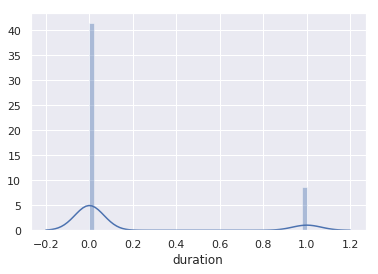

In [72]:
sns.distplot(df['duration']<'1 minute')

In [73]:
failed_or_worked =[]

In [74]:
print(len(df[df['duration']<'1 minute']))
failed_or_worked.append(len(df[df['duration']<'1 minute']))

1001


In [75]:
print(len(df)-len(df[df['duration']<'1 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'1 minute']))

4820


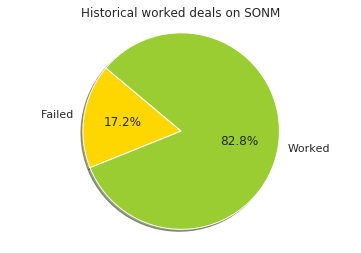

In [76]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [77]:
failed_or_worked =[]

In [78]:
print(len(df[df['duration']<'5 minute']))
failed_or_worked.append(len(df[df['duration']<'5 minute']))

2594


In [79]:
print(len(df)-len(df[df['duration']<'5 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'5 minute']))

3227


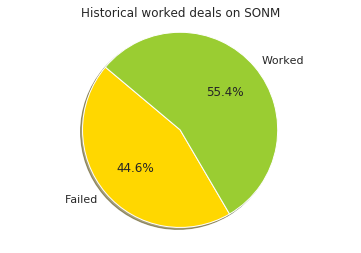

In [80]:

# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [81]:
failed_or_worked =[]

In [82]:
print(len(df[df['duration']<'10 minute']))
failed_or_worked.append(len(df[df['duration']<'10 minute']))

3400


In [83]:
print(len(df)-len(df[df['duration']<'10 minute']))
failed_or_worked.append(len(df)-len(df[df['duration']<'10 minute']))

2421


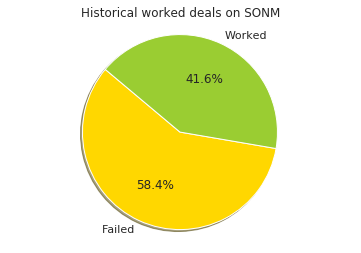

In [84]:

# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM')
plt.show()

In [85]:
df7 = df[df["starttime"].dt.month==7]

1474
1003


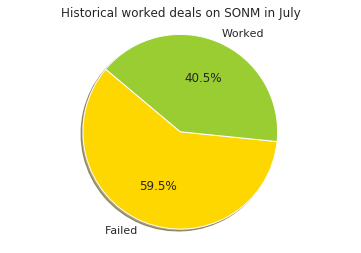

In [86]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in July')
plt.show()



In [87]:
df7 = df[df["starttime"].dt.month==8]

1598
1146


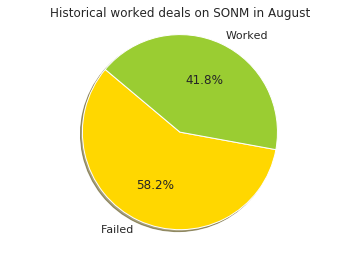

In [88]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in August')
plt.show()


In [89]:
df7 = df[df["starttime"].dt.month==6]

7
33


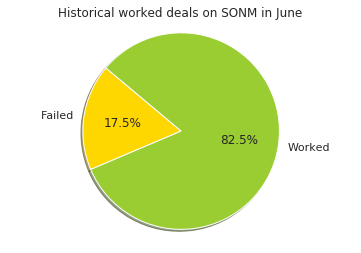

In [90]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in June')
plt.show()


In [91]:
df7 = df[df["starttime"].dt.month==9]

321
239


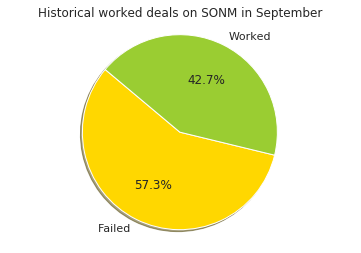

In [92]:
failed_or_worked =[]

print(len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7[df7['duration']<'10 minute']))


print(len(df7)-len(df7[df7['duration']<'10 minute']))
failed_or_worked.append(len(df7)-len(df7[df7['duration']<'10 minute']))




# Data to plot
labels = 'Failed', 'Worked'
sizes = failed_or_worked
colors = ['gold', 'yellowgreen']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('Historical worked deals on SONM in September')
plt.show()

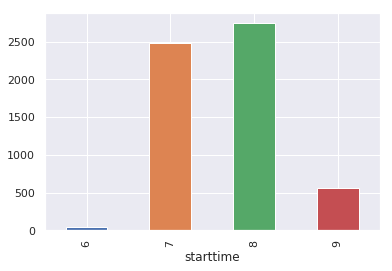

In [93]:
df.groupby(df["starttime"].dt.month).count()[0].plot(kind="bar", label = False)

In [94]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NG...",0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4MT...",0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4NT...",0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,"""consumerCertificates"":""W3sib3duZXJJRCI6IjB4ND...",0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51


In [95]:
(df['starttime'][0] - df['endtime'][0]).seconds/60

1306

In [96]:
df['duration'][0].total_seconds()

8010.000000000001

In [97]:
def convert_duration_to_minutes(content):
    return content.total_seconds()/60

In [98]:
convert_duration_to_minutes(df['duration'][0])

133.50000000000003

In [99]:
df['duration_minutes']= df['duration'].apply(convert_duration_to_minutes)

In [100]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


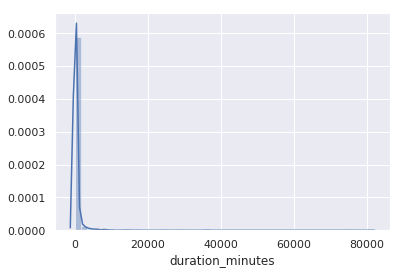

In [101]:
sns.distplot(df.duration_minutes)

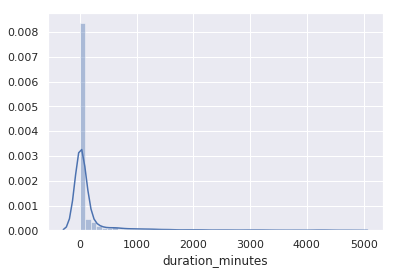

In [102]:
sns.distplot(df[df['duration_minutes']<5000]['duration_minutes'])

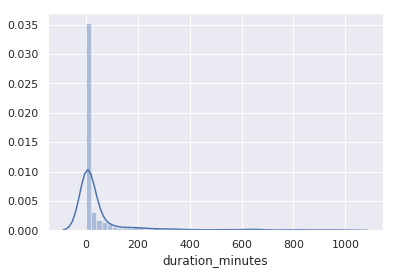

In [103]:
sns.distplot(df[df['duration_minutes']<1000]['duration_minutes'])

In [104]:
df2 = df[df['duration_minutes']>10]

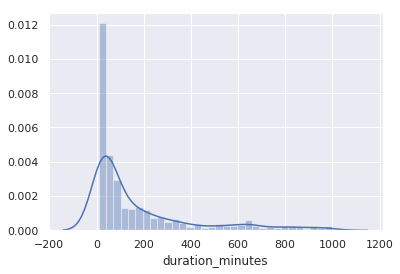

In [105]:
sns.distplot(df2[df2['duration_minutes']<1000]['duration_minutes'])

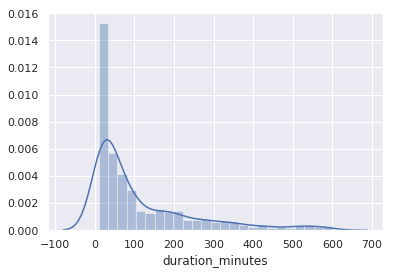

In [106]:
sns.distplot(df2[df2['duration_minutes']<600]['duration_minutes'])

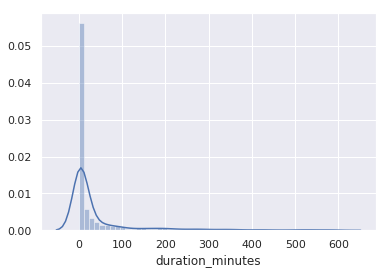

In [107]:
sns.distplot(df[df['duration_minutes']<600]['duration_minutes'])

In [108]:
df7 = df2[df2["starttime"].dt.month==7]

In [109]:
df8 = df2[df2["starttime"].dt.month==8]

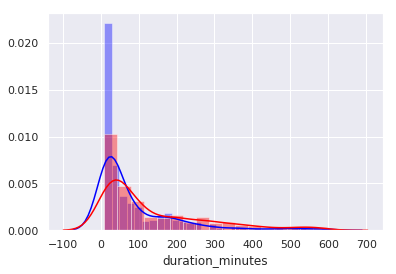

In [110]:
sns.distplot(df7[df7['duration_minutes']<600]['duration_minutes'], color = 'blue', label = 'July')
sns.distplot(df8[df8['duration_minutes']<600]['duration_minutes'], color = 'red', label = 'August')


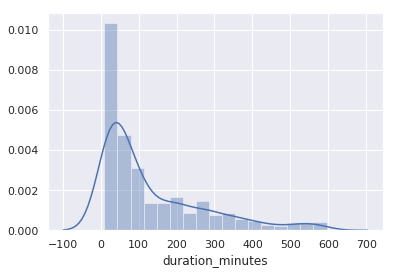

In [111]:
sns.distplot(df8[df8['duration_minutes']<600]['duration_minutes'])

# master_ID historical duration based

In [112]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


In [113]:
df.sort_values('duration_minutes', ascending= False)[['duration','consumer_ID','master_ID',  'price_USD/h','Ethash']].head(10)

,duration,consumer_ID,master_ID,price_USD/h,Ethash
3416,56 days 04:10:17.387640,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,0.00000,0.0
2983,56 days 04:01:02.283834,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,0.00000,0.0
5547,52 days 12:47:08.929489,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00000,0.0
5584,25 days 03:28:50.938061,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.0
5639,25 days 03:28:20.947869,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00010,0.0
5672,25 days 03:14:56.967350,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
5802,25 days 02:58:17.992807,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
5577,25 days 02:56:20.932879,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,0.00001,0.0
23,20 days 09:14:45,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,0.00000,0.0
5383,19 days 12:35:07.885572,0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11,0x3C63D359D86E6165a2eBe911caA822d90e85432C,0.00000,0.0


In [114]:
df.groupby('master_ID').describe()

Ethash                            \
                                             count        mean           std   
master_ID                                                                      
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a     2.0   48.841000  0.000000e+00   
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3     2.0   43.452000  0.000000e+00   
0x0bF957203A68367c344c7B6b60729Fc8354915ef     1.0    0.000000           NaN   
0x12d5e94d46B65df250B43d426777462e66226F0f    50.0  159.800000  0.000000e+00   
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    59.0  184.143644  6.731374e+01   
0x197B93384DE6572D9c282C44D45588B0e902C266    43.0   16.082442  2.222325e-01   
0x1a13173445903d59B1567378989590e6b15A16B7    10.0   16.246000  3.744889e-15   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5     2.0    0.000000  0.000000e+00   
0x2031851e4d38A850A6A3527597d53D66928332a7    17.0    0.000000  0.000000e+00   
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    19.0   13.253000  1.825033e-15   
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8     1.0   24.722000           NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE    27.0    0.000000  0.000000e+00   
0x24E192b02d33501f225580d6B19A8d97C5190D45    41.0   17.353463  1.584721e+01   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    67.0  133.448657  4.918008e+01   
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3   463.0   50.301309  2.753134e+01   
0x25158E6f8dD683d222E3785BA2294A319489084E    65.0   39.155477  3.900450e+01   
0x257308430e87b7E45816Bda27DC76cbF739fCD30    50.0   43.714760  3.064148e+01   
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    42.0    0.000000  0.000000e+00   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    44.0   17.114659  8.577145e+00   
0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b     1.0    0.000000           NaN   
0x2c743F2731c5803A649695930DD09a82Bba2B9c6     4.0    0.000000  0.000000e+00   
0x2ff5E25E63294728F2D0B10bAA36223E6D98702C     1.0   53.175000           NaN   
0x3C63D359D86E6165a2eBe911caA822d90e85432C     1.0    0.000000           NaN   
0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA     1.0    0.000000           NaN   
0x3acA407923bAaA8A609Ae6828A6A9dF822ee2026     1.0    0.000000           NaN   
0x402DF15486Be8baEe6162a1b8A03a10d82D86232    14.0    0.000000  0.000000e+00   
0x416Af57F633e292b25976573a460d7C3200feD34   170.0  135.563906  5.865629e+01   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    62.0   27.677177  8.264190e+00   
0x461a6357Aa4381d51965248244b38508c1acDaF8     2.0   24.815000  0.000000e+00   
0x4AADcF4719a29C2bcC8481eddf848a5F3Cfc4fC1     3.0    8.292667  7.851964e-02   
...                                            ...         ...           ...   
0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2    20.0    8.357400  4.186746e-02   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     7.0    0.000000  0.000000e+00   
0xFe388151D3d862f6A6178876eA5Cc4E5718F1957    88.0    1.211068  5.581618e+00   
0xa2b5595641f4CdDC55A4B2862Fb03BaE800222C0     1.0    0.000000           NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    22.0   41.296182  3.195160e+01   
0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561    12.0    0.000000  0.000000e+00   
0xab6A4bFd3670c1221D0c7fdf4cF04EbcFd87dd25    17.0    0.000000  0.000000e+00   
0xb272F78Cb008CBe9102dA1202c4349A80468AdD4     1.0    0.000000           NaN   
0xb3A8866183ca88ED3c233337C4f85045a2aD7d1F     1.0   27.459000           NaN   
0xb5c46741B45317bFdF370D3d021a2515AC4fF998    11.0    0.000000  0.000000e+00   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    18.0   21.711000  1.824089e+01   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40     2.0    0.000000  0.000000e+00   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba    11.0    0.000000  0.000000e+00   
0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0     2.0    0.000000  0.000000e+00   
0xcE3B31E47c72ca2f5B043c150a357C20883336DF    26.0  114.901692  3.820893e+01   
0xd0ecfF77c5B50BAB4D865CB1254A14ddfA05A6F0     1.0   13.125000           NaN   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82  

In [115]:
df50 = df.groupby('master_ID').describe()

In [116]:
df51 = df50['duration_minutes'][['count','mean']]

In [117]:
df51.to_csv('master_ID.csv')

In [118]:
df52 = pd.read_csv('master_ID.csv')

In [119]:
df52.head()

,master_ID,count,mean
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100


In [120]:
df52['master_ID'][0]

'0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a'

In [121]:
df[df.master_ID == df52['master_ID'][3]]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
38,"{""deal"":{""id"":""3881""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3881,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-16 00:48:50,2018-08-16 03:45:35,02:56:45,176.750000
113,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.500000
234,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.850000
279,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.000000
292,"{""deal"":{""id"":""3641""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3641,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:53:22,2018-08-15 23:32:26,05:39:04,339.066667
1251,"{""deal"":{""id"":""3703""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3703,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:33:17,2018-08-15 23:33:47,00:00:30,0.500000
1337,"{""deal"":{""id"":""3707""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3707,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:34:29,2018-08-15 23:35:02,00:00:33,0.550000
1509,"{""deal"":{""id"":""3711""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3711,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:35:47,2018-08-15 23:36:20,00:00:33,0.550000
1631,"{""deal"":{""id"":""3715""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3715,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:37:08,2018-08-15 23:37:44,00:00:36,0.600000
1819,"{""deal"":{""id"":""3719""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3719,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:38:29,2018-08-15 23:38:56,00:00:27,0.450000


In [122]:
df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10

38      False
113      True
234      True
279      True
292     False
1251     True
1337     True
1509     True
1631     True
1819     True
1872     True
1897     True
1934     True
1965     True
2011     True
2096     True
2103     True
2158     True
2203     True
2290    False
2296     True
2319     True
2324     True
2329     True
2343     True
2344     True
2346     True
2352     True
2357     True
2360     True
2368     True
2375     True
2376     True
2382     True
2388     True
2395     True
2458    False
2569    False
2577     True
2761    False
3125    False
3267    False
3281    False
3310     True
3315    False
3327     True
3344     True
3347     True
3351     True
3363    False
Name: duration_minutes, dtype: bool

In [123]:
df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
113,"{""deal"":{""id"":""3630""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3630,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:47:49,2018-08-15 17:48:19,00:00:30,0.50
234,"{""deal"":{""id"":""3634""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3634,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:49:25,2018-08-15 17:50:16,00:00:51,0.85
279,"{""deal"":{""id"":""3638""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3638,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 17:51:19,2018-08-15 17:52:19,00:01:00,1.00
1251,"{""deal"":{""id"":""3703""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3703,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:33:17,2018-08-15 23:33:47,00:00:30,0.50
1337,"{""deal"":{""id"":""3707""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3707,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:34:29,2018-08-15 23:35:02,00:00:33,0.55
1509,"{""deal"":{""id"":""3711""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3711,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:35:47,2018-08-15 23:36:20,00:00:33,0.55
1631,"{""deal"":{""id"":""3715""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3715,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:37:08,2018-08-15 23:37:44,00:00:36,0.60
1819,"{""deal"":{""id"":""3719""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3719,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:38:29,2018-08-15 23:38:56,00:00:27,0.45
1872,"{""deal"":{""id"":""3724""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3724,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:39:47,2018-08-15 23:40:23,00:00:36,0.60
1897,"{""deal"":{""id"":""3730""","""benchmarks"":{""values"":[106",1092,2,256000000,67108864,1000001,1000000,6,8506048512,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x5C58ed5549db58d53816557Abf62F04d3F8BB6D3,0.148475,159.8,3730,0x12d5e94d46B65df250B43d426777462e66226F0f,2018-08-15 23:41:17,2018-08-15 23:41:50,00:00:33,0.55


In [124]:
len(df[df.master_ID == df52['master_ID'][3]][df[df.master_ID == df52['master_ID'][3]]['duration_minutes']<10])

39

In [125]:
def count_failed_deal(content):
    return len(df[df.master_ID == content][df[df.master_ID == content]['duration_minutes']<10])

In [126]:
count_failed_deal(df52['master_ID'][3])

39

In [127]:
df52['failed_deal_number']=df52['master_ID'].apply(count_failed_deal)

In [128]:
df52.head()

,master_ID,count,mean,failed_deal_number
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46


In [129]:
df52['failed_deal_percent']=df52['failed_deal_number']/df52['count']*100

In [130]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102


In [131]:
df52.sort_values('failed_deal_percent', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent
55,0x8125721C2413d99a33E351e1F6Bb4e56b6b633FD,1.0,0.000000,1,100.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
37,0x600C6ad88D973eC1E3F040E3E4166FA49b57700c,2.0,1.575000,2,100.000000
23,0x3D38C98eDDC026D8977767a30f8e8f6ec0405aBA,1.0,7.100000,1,100.000000
19,0x29E86F84A2D550deA9976d2a0198eBdD4BAB006b,1.0,1.050000,1,100.000000
97,0xcBF471Deb96286f0bA09Fc98cA92Ee8c19fbd2e0,2.0,6.850000,2,100.000000
53,0x7f1D9bD0a76fA3DfBB2759bb37d5fB29B28C376F,2.0,1.525000,2,100.000000
16,0x257308430e87b7E45816Bda27DC76cbF739fCD30,50.0,154.156661,44,88.000000
32,0x4ccba01943Cc51Ba70232C42cBb8bd358fcBe15e,7.0,6.442857,6,85.714286


In [132]:
df52[df52['count']>10].sort_values('failed_deal_percent', ascending = False)[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
16,0x257308430e87b7E45816Bda27DC76cbF739fCD30,50.0,88.000000
84,0xF412cAADF8B33AdFFd8343066BFCc7B718f115F2,20.0,85.000000
47,0x6f74D76F4c4b80A61598bdED7Fca2f660CA742Ce,88.0,80.681818
5,0x197B93384DE6572D9c282C44D45588B0e902C266,43.0,79.069767
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,78.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,77.966102
65,0x9Ca4Bb5206553ca12e073795f820C41379e5Cc6c,17.0,76.470588
80,0xE10FA93E690EaDC9cE29d1CF934A4337334413d2,172.0,73.255814
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,73.218143
72,0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE,115.0,73.043478


In [133]:
df52[df52['count']>10].sort_values('failed_deal_percent')[['master_ID','count','failed_deal_percent']]

,master_ID,count,failed_deal_percent
89,0xaF8aDfD8fc6f5cb98C40046156D8fEb37Ab7f561,12.0,0.000000
8,0x2031851e4d38A850A6A3527597d53D66928332a7,17.0,5.882353
60,0x9115B03bA37AF450b21bc23b546Ff7666E30015D,44.0,13.636364
25,0x402DF15486Be8baEe6162a1b8A03a10d82D86232,14.0,14.285714
113,0xfc29ED3d7E470c26cd34ff33B96bEFbC8228BF03,12.0,16.666667
93,0xb5c46741B45317bFdF370D3d021a2515AC4fF998,11.0,18.181818
96,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,18.181818
51,0x7610dd9944615263d9858101Dd197C90255DBa93,16.0,18.750000
58,0x87d341DF84A64b5289cf8A504F22cC10F509E9d6,13.0,23.076923
73,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,25.000000


In [134]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102


In [135]:
df52['total_duration'] = df52['count']*df52['mean']

In [136]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102,12095.182920


In [137]:
df52.sort_values('total_duration', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
109,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,42768.990857,0,0.000000,256613.945141
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,172.604926,949,65.994437,248205.883333
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,413.900561,150,51.369863,120858.963916
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,515.582340,96,56.470588,87648.997738
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,40467.094897,0,0.000000,80934.189794
83,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,80881.038064,0,0.000000,80881.038064
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667
71,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,523.0,145.691268,310,59.273423,76196.533333
96,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,6310.650000,2,18.181818,69417.150000


In [138]:
df52.sort_values('total_duration', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration
109,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,42768.990857,0,0.000000,256613.945141
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,172.604926,949,65.994437,248205.883333
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,413.900561,150,51.369863,120858.963916
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,515.582340,96,56.470588,87648.997738


In [139]:
df52.sort_values('total_duration', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
109,0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3,6.0,256613.945141,0.000000
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,248205.883333,65.994437
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,134336.366667,40.825688
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,120858.963916,51.369863
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,87648.997738,56.470588
7,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2.0,80934.189794,0.000000
83,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,1.0,80881.038064,0.000000
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143
71,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,523.0,76196.533333,59.273423
96,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,11.0,69417.150000,18.181818


In [140]:
len(df52)

114

In [141]:
df52.sort_values('count', ascending = False)[['master_ID','count','total_duration','failed_deal_percent']]

,master_ID,count,total_duration,failed_deal_percent
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,248205.883333,65.994437
71,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,523.0,76196.533333,59.273423
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,80150.716667,73.218143
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,120858.963916,51.369863
79,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,266.0,40817.666238,70.300752
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,134336.366667,40.825688
80,0xE10FA93E690EaDC9cE29d1CF934A4337334413d2,172.0,13325.316667,73.255814
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,87648.997738,56.470588
44,0x6F6B9a47668D96b3758D79c67c30A290934a759F,161.0,40260.733177,60.248447
82,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,157.0,50641.881843,66.878981


In [142]:
df.groupby('master_ID').describe()['price_USD/h']['mean']

master_ID
0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a    0.046514
0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3    0.037993
0x0bF957203A68367c344c7B6b60729Fc8354915ef    0.700000
0x12d5e94d46B65df250B43d426777462e66226F0f    0.149177
0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE    0.157352
0x197B93384DE6572D9c282C44D45588B0e902C266    0.015260
0x1a13173445903d59B1567378989590e6b15A16B7    0.019930
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.015876
0x2031851e4d38A850A6A3527597d53D66928332a7    0.003067
0x21dd5b54664222AbD2E0F43efbDc9F3C592874f1    0.015314
0x22E00835bD4b84456Ab3aA5E61a7FF07AB57b4A8    0.029976
0x22d709876F24Da89933008Cd714A1CB3B29090eE    0.026889
0x24E192b02d33501f225580d6B19A8d97C5190D45    0.015576
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    0.128381
0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3    0.054443
0x25158E6f8dD683d222E3785BA2294A319489084E    0.032703
0x257308430e87b7E45816Bda27DC76cbF739fCD30    0.027231
0x25cAAc2BEB705b091A57D50d0297f0Daecb8A4D2    0.003941


In [143]:
df52['mean_price_USD/h'] = df.groupby('master_ID').describe()['price_USD/h']['mean'].values

In [144]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102,12095.182920,0.157352


In [145]:
df52['total_duration_h'] =  df52['total_duration']/60

In [146]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102,12095.182920,0.157352,201.586382


In [147]:
df52['total_revenue_USD'] = df52['total_duration_h']*df52['mean_price_USD/h']

In [148]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102,12095.182920,0.157352,201.586382,31.720025


In [149]:
df52.sort_values('total_revenue_USD', ascending = False)

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,172.604926,949,65.994437,248205.883333,0.085712,4136.764722,354.571627
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,515.582340,96,56.470588,87648.997738,0.120094,1460.816629,175.434654
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
73,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
82,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,157.0,322.559757,105,66.878981,50641.881843,0.093402,844.031364,78.834615
98,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,1299.180769,8,30.769231,33778.700000,0.136273,562.978333,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,173.111699,339,73.218143,80150.716667,0.054443,1335.845278,72.727468
79,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,266.0,153.449873,187,70.300752,40817.666238,0.100071,680.294437,68.077727
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,413.900561,150,51.369863,120858.963916,0.029644,2014.316065,59.712132
104,0xe7517190DB97Ea55E985abdA33745AfC41a83592,39.0,458.509388,21,53.846154,17881.866147,0.128210,298.031102,38.210644


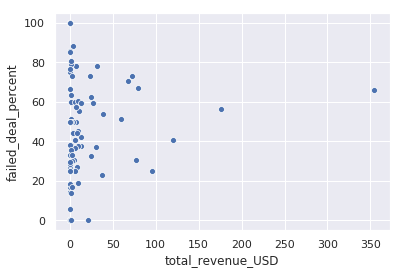

In [150]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent')

In [151]:
df52.sort_values('total_revenue_USD', ascending = False).head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,172.604926,949,65.994437,248205.883333,0.085712,4136.764722,354.571627
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,515.582340,96,56.470588,87648.997738,0.120094,1460.816629,175.434654
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
73,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
82,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,157.0,322.559757,105,66.878981,50641.881843,0.093402,844.031364,78.834615


In [152]:
df52.sort_values('total_revenue_USD', ascending = False)[['master_ID','count','total_duration_h','failed_deal_percent','total_revenue_USD']]

,master_ID,count,total_duration_h,failed_deal_percent,total_revenue_USD
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,4136.764722,65.994437,354.571627
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,1460.816629,56.470588,175.434654
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,2238.939444,40.825688,119.690603
73,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,928.975556,25.000000,95.969972
82,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,157.0,844.031364,66.878981,78.834615
98,0xcE3B31E47c72ca2f5B043c150a357C20883336DF,26.0,562.978333,30.769231,76.718810
14,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,463.0,1335.845278,73.218143,72.727468
79,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,266.0,680.294437,70.300752,68.077727
33,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,292.0,2014.316065,51.369863,59.712132
104,0xe7517190DB97Ea55E985abdA33745AfC41a83592,39.0,298.031102,53.846154,38.210644


In [153]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
0,0x0234e42BE2b766eA3f2ce33f2955c4e09a63e37a,2.0,160.716667,0,0.000000,321.433333,0.046514,5.357222,0.249187
1,0x03fc916ff9F9cC925041F566bc1b49C6ec897bd3,2.0,5.750000,2,100.000000,11.500000,0.037993,0.191667,0.007282
2,0x0bF957203A68367c344c7B6b60729Fc8354915ef,1.0,2.350000,1,100.000000,2.350000,0.700000,0.039167,0.027417
3,0x12d5e94d46B65df250B43d426777462e66226F0f,50.0,58.967333,39,78.000000,2948.366667,0.149177,49.139444,7.330452
4,0x15a16a98d0F6Bf91859e240e4DA02171D31BBDCE,59.0,205.003100,46,77.966102,12095.182920,0.157352,201.586382,31.720025


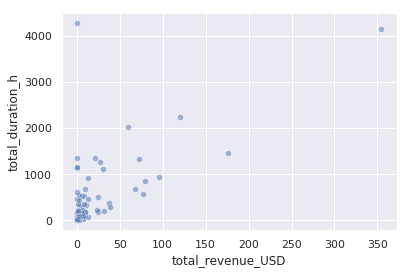

In [154]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'total_duration_h', alpha = 0.5)

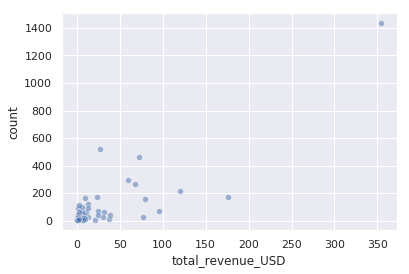

In [155]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'count', alpha = 0.5)

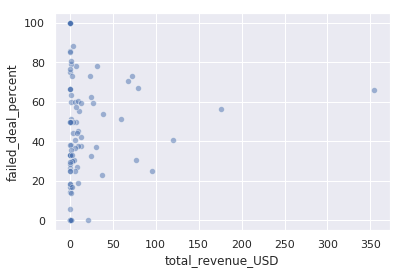

In [156]:
sns.scatterplot(data = df52, x = 'total_revenue_USD', y = 'failed_deal_percent', alpha = 0.5)

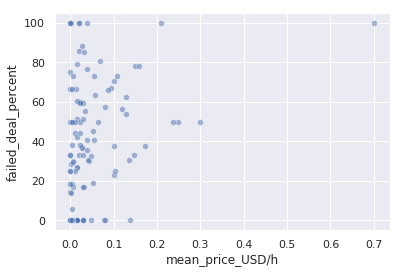

In [157]:
sns.scatterplot(data = df52, x = 'mean_price_USD/h', y = 'failed_deal_percent', alpha = 0.5)

## top suppliers best customers

In [158]:
df52 = df52.sort_values('total_revenue_USD', ascending = False)

In [159]:
df52.head()

,master_ID,count,mean,failed_deal_number,failed_deal_percent,total_duration,mean_price_USD/h,total_duration_h,total_revenue_USD
105,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,1438.0,172.604926,949,65.994437,248205.883333,0.085712,4136.764722,354.571627
26,0x416Af57F633e292b25976573a460d7C3200feD34,170.0,515.582340,96,56.470588,87648.997738,0.120094,1460.816629,175.434654
35,0x517648Ec2E592969Ec344642034F079c52AfD025,218.0,616.221865,89,40.825688,134336.366667,0.053459,2238.939444,119.690603
73,0xB44C1F75286400c65eEe6ee8F62C6Fcca8AfFD61,68.0,819.684314,17,25.000000,55738.533333,0.103307,928.975556,95.969972
82,0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F,157.0,322.559757,105,66.878981,50641.881843,0.093402,844.031364,78.834615


In [160]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
consumer_ID,,,,,,,,
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
0x417c92FbD944b125A578848DE44a4FD9132E0911,532.0,0.140346,0.105691,1.529110e-02,0.044944,0.090267,0.250949,0.344764
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb,33.0,0.037504,0.011244,1.972234e-02,0.034320,0.037486,0.049521,0.049521
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad,28.0,0.057084,0.001316,5.364863e-02,0.057354,0.057386,0.057399,0.060100
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,18.0,0.154444,0.046301,4.000000e-02,0.125000,0.170000,0.195000,0.200000
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb,17.0,0.046989,0.015754,3.882064e-02,0.040000,0.040000,0.040000,0.080000


In [161]:
df_B7 = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['price_USD/h'].sort_values('count', ascending = False)

In [162]:
df_B7.to_csv('B7.csv')

In [163]:
dfB7 = pd.read_csv('B7.csv')

In [164]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,532.0,0.140346,0.105691,1.529110e-02,0.044944,0.090267,0.250949,0.344764
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000


In [165]:
df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean']

consumer_ID
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9      33.687937
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb     617.567078
0x1a13173445903d59B1567378989590e6b15A16B7     846.071429
0x417c92FbD944b125A578848DE44a4FD9132E0911      81.692387
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245       4.000000
0x517648Ec2E592969Ec344642034F079c52AfD025      57.225000
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5      67.910000
0x7610dd9944615263d9858101Dd197C90255DBa93     255.450000
0x921DfF043950872280116dC949e675A5e1aC726D     107.950000
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01      20.436111
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb      69.513636
0xE75Bba413A645d0b6fB851b969fE033b478BC992    2666.325000
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad     285.978571
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833    6735.816667
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10      32.455000
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d     879.514583
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb     526.911765
0x

In [166]:
dfB7['duration_minutes_mean'] = df[df.master_ID == '0xedB7Ae4B946Cf249349974A02e354B5FBC577798'].groupby('consumer_ID').describe()['duration_minutes']['mean'].values

In [167]:
dfB7['total_duration_minutes']=dfB7['count']*dfB7['duration_minutes_mean']

In [168]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,33.687937,20246.450000
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,532.0,0.140346,0.105691,1.529110e-02,0.044944,0.090267,0.250949,0.344764,617.567078,328545.685597
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,81.692387,3186.003102
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000


In [169]:
dfB7['total_expense_USD'] = dfB7['count']*dfB7['total_duration_minutes']/60

In [170]:
dfB7.head()

,consumer_ID,count,mean,std,min,25%,50%,75%,max,duration_minutes_mean,total_duration_minutes,total_expense_USD
0,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,601.0,0.044064,0.016989,0.000000e+00,0.038397,0.053870,0.053870,0.069526,33.687937,20246.450000,2.028019e+05
1,0x417c92FbD944b125A578848DE44a4FD9132E0911,532.0,0.140346,0.105691,1.529110e-02,0.044944,0.090267,0.250949,0.344764,617.567078,328545.685597,2.913105e+06
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,81.0,0.109880,0.098786,1.440000e-14,0.040000,0.052635,0.204600,0.430000,846.071429,68531.785714,9.251791e+04
3,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,39.0,0.003308,0.001962,1.000000e-03,0.001000,0.005000,0.005000,0.005000,81.692387,3186.003102,2.070902e+03
4,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,34.0,0.074826,0.048637,0.000000e+00,0.040000,0.057043,0.100000,0.150000,4.000000,136.000000,7.706667e+01


# Same analysis for consumers

In [171]:
df.groupby('consumer_ID').describe()

Ethash                         \
                                             count        mean        std   
consumer_ID                                                                 
0x0bF957203A68367c344c7B6b60729Fc8354915ef     2.0   19.474500  10.103849   
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9  1341.0   42.384800  14.110975   
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb   442.0   45.357068  58.549385   
0x1a13173445903d59B1567378989590e6b15A16B7    11.0   20.933455   4.189422   
0x201CDce452A3FE1a9baCfaD7f596429D36508f05     1.0    0.000000        NaN   
0x22d709876F24Da89933008Cd714A1CB3B29090eE     6.0    0.000000   0.000000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4     2.0  172.350000   0.000000   
0x25158E6f8dD683d222E3785BA2294A319489084E     1.0   16.246000        NaN   
0x384B08b25B4B78eb43969b2500999d1Ac3c82007    30.0   19.463167  43.891490   
0x4138Feb376d3a85ebD4E211fa8A7dAd081575494     1.0   53.251000        NaN   
0x417c92FbD944b125A578848DE44a4FD9132E0911  2547.0   83.160426  67.934760   
0x4567Da76D1c0239c21b33fa9aD767E9188108c0e     1.0    0.000000        NaN   
0x47700c0f8c34a42BA88B35c9E67E5A925c7BF245    23.0   27.677609  24.115005   
0x49f6C95B97C209F814c5b3B13428E91686a1FEd9    12.0    0.000000   0.000000   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA   213.0    0.000000   0.000000   
0x5139732b07cD630E13F852Dd92c4cA3DC625e7E9     1.0    0.000010        NaN   
0x517648Ec2E592969Ec344642034F079c52AfD025     5.0   75.670000   9.248377   
0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5   151.0   57.524285  54.797784   
0x63dA2009Ff928f99D960F48CBDd76C5a3E8591c4     2.0    9.720500  13.746863   
0x65A235FFf4F2c6344642c417cb4cE9fA698A5d2b     1.0    0.000000        NaN   
0x67588f2F50227F200B3dd6bd2Bf23076A27C18Ea     3.0    0.000000   0.000000   
0x6bdAc2AE57AA8325206bDD076e3022b12D64a4b6    16.0    0.000000   0.000000   
0x73208ae757b5a5747d79da4a08ba4FB3012ef0E8     5.0    0.000000   0.000000   
0x75CA26f23e0fC696af5Cb135b0ABfD53807691fE     1.0    0.000000        NaN   
0x75f554D5298c25C14De9D4BF12c6C1e19F9DB752     1.0    0.000000        NaN   
0x7610dd9944615263d9858101Dd197C90255DBa93   100.0    9.383000  33.657890   
0x77D216e0D9EDb9e99AC1c34152C52e7d9F799117    14.0   35.154286  13.154562   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6     2.0    0.000000   0.000000   
0x921DfF043950872280116dC949e675A5e1aC726D     5.0    5.589800   8.741249   
0x9da256F79Fa66Bb20626940e23590219a2b9746E     1.0    0.000000        NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    68.0   86.520588  72.227205   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    55.0    0.000000   0.000000   
0xC0374AcF397563dBD8DeE433dd2d956729b9dBdA     6.0    0.000000   0.000000   
0xC55339c316ab31276A0a1489E2C4ecD9c19CBdfb    57.0   39.114404  14.116247   
0xCAF1d4F102Da3aa56CDCE3dAA4E5121EF72EFCD1     1.0    0.000000        NaN   
0xE75Bba413A645d0b6fB851b969fE033b478BC992     2.0   26.625000   0.000000   
0xE8C01385bb6443AF00A42A91aef3b98b2445Fdad    43.0   56.480186  23.809086   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F     7.0   93.352000  46.137366   
0xEe7Ff0a44C62209aa7dAa450F673415bC90bFC11     2.0    0.000000   0.000000   
0xF044524c6A30bC7559DEa1CB21fA11b1f5817833     6.0    0.000000   0.000000   
0xF722c6A22B38c087e9249afe6a2fd7635ffB154E     3.0    0.000000   0.000000   
0xFc5Ed3751d48e4498F7556618D536ad124B131F7     1.0   26.655000        NaN   
0xb4Eba44EE900A68b8B745eFCC34b4D8A80C2dB10    45.0   55.761578  30.581966   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    16.0   35.745625  36.043541   
0xbAB383464dC6732b7E36EbCAA909ED0192faFaBb    30.0   28.676867  11.130898   
0xbaCcB540c12bF3baaCD77beB161C31700022ED40    21.0   19.689143  14.597532   
0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba   328.0    0.000000   0.000000   
0xd7eE275c57917cD2EeA621bfc0b1f80EA59381Ff     2.0    0.000000   0.000000   
0xe7517190DB97Ea55E985abdA33745AfC41a83592    49.0    0.168898   1.182286   
0xe7c4FA1BD62E425bB52eFFf88ddf3898a9A218

In [172]:
df61 = df.groupby('consumer_ID').describe()

In [173]:
df61['duration_minutes'][['count','mean']]

,count,mean
consumer_ID,,
0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175
0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,9025.293255
0x22d709876F24Da89933008Cd714A1CB3B29090eE,6.0,650.250000
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2.0,0.725000
0x25158E6f8dD683d222E3785BA2294A319489084E,1.0,4.850000
0x384B08b25B4B78eb43969b2500999d1Ac3c82007,30.0,503.024444


In [174]:
df62 = df61['duration_minutes'][['count','mean']]

In [175]:
df62.to_csv('consumer.csv')

In [176]:
df62 = pd.read_csv('consumer.csv')

In [177]:
df62.head()

,consumer_ID,count,mean
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,9025.293255


In [178]:
df62['total_duration_minute'] = df62['count']*df62['mean']

In [179]:
df62.head()

,consumer_ID,count,mean,total_duration_minute
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175,756006.159412
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,9025.293255,9025.293255


In [180]:
df62['total_duration_h']=df62['total_duration_minute']/60

In [181]:
df62.head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
0,0x0bF957203A68367c344c7B6b60729Fc8354915ef,2.0,190.025000,380.050000,6.334167
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175,756006.159412,12600.102657
3,0x1a13173445903d59B1567378989590e6b15A16B7,11.0,594.109091,6535.200000,108.920000
4,0x201CDce452A3FE1a9baCfaD7f596429D36508f05,1.0,9025.293255,9025.293255,150.421554


In [182]:
df62.sort_values('total_duration_h', ascending = False)

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175,756006.159412,12600.102657
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,2547.0,177.371299,451764.697942,7529.411632
13,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,22918.431390,275021.176682,4583.686278
46,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
50,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,67.0,1635.160881,109555.779048,1825.929651
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,41.938143,56239.050000,937.317500
14,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,182.605164,38894.900000,648.248333
51,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,556.713768,38413.250000,640.220833
30,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,511.110784,34755.533333,579.258889
39,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,6.0,5613.238889,33679.433333,561.323889


In [183]:
df62.sort_values('total_duration_h', ascending = False).head()

,consumer_ID,count,mean,total_duration_minute,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,1710.421175,756006.159412,12600.102657
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,2547.0,177.371299,451764.697942,7529.411632
13,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,22918.431390,275021.176682,4583.686278
46,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,648.198984,212609.266667,3543.487778
50,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,67.0,1635.160881,109555.779048,1825.929651


In [184]:
df62.sort_values('total_duration_h', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,12600.102657
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,2547.0,7529.411632
13,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,12.0,4583.686278
46,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
50,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,67.0,1825.929651
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
14,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
51,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,640.220833
30,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,579.258889
39,0xF044524c6A30bC7559DEa1CB21fA11b1f5817833,6.0,561.323889


In [185]:
len(df62)

52

In [186]:
df62.sort_values('count', ascending = False)[['consumer_ID','count','total_duration_h']]

,consumer_ID,count,total_duration_h
10,0x417c92FbD944b125A578848DE44a4FD9132E0911,2547.0,7529.411632
1,0x1124fCC307756f4077c5e8E09b948C1CA7123eC9,1341.0,937.317500
2,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,442.0,12600.102657
46,0xcB9Bb24E33A4F0f482f7060e6D4a4C178609B0ba,328.0,3543.487778
14,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,213.0,648.248333
17,0x5D2c0CF8ec8C2d10Cda338f2d59893B433D276a5,151.0,172.176389
25,0x7610dd9944615263d9858101Dd197C90255DBa93,100.0,122.025551
51,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,69.0,640.220833
30,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,68.0,579.258889
50,0xeFe1976D528FdeAC56E09115462dDedB26254BF7,67.0,1825.929651


# Timestamp analysis

# new plots

In [187]:
N = 1000
times = pd.date_range('2018-06', '2018-09', freq='H')
ind = np.random.permutation(np.arange(len(times)))[:N]

data = pd.DataFrame({'TIMESTAMP': times,
                     'TYPE': np.random.randint(0, 10, len(times))})
data.head()

,TIMESTAMP,TYPE
0,2018-06-01 00:00:00,2
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,6
3,2018-06-01 03:00:00,1
4,2018-06-01 04:00:00,1


In [188]:
len(data)

2209

In [189]:
data['TIMESTAMP'][2000]

Timestamp('2018-08-23 08:00:00')

In [190]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


In [191]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
2983,"{""deal"":{""id"":""1397""","""benchmarks"":{""values"":[105",1020,24,4194304,67108864,1200,1000,0,0,...,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xAe4fD4581D82C615105c798c73d1C33403d86ACB,0.000000,0.000,1397,0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32,2018-07-12 16:58:37,2018-09-06 20:59:39.283834,56 days 04:01:02.283834,80881.038064
3030,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58.000000,0 days 02:14:06,134.100000
3377,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10.000000,0 days 00:26:18,26.300000
3416,"{""deal"":{""id"":""1394""","""benchmarks"":{""values"":[103",905,72,4194304,67108864,1200,1000,0,0,...,0x49f6C95B97C209F814c5b3B13428E91686a1FEd9,0xC3C8b2915f62956066eD5C8719814e276A7B8C00,0.000000,0.000,1394,0x1bC66B0374C997cF9CB087Ef184975f174c053b5,2018-07-12 16:49:22,2018-09-06 20:59:39.387640,56 days 04:10:17.387640,80890.289794
3426,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37.000000,0 days 02:14:09,134.150000
3551,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38.000000,2 days 11:09:25,3549.416667
3581,"{""deal"":{""id"":""4882""","""benchmarks"":{""values"":[9603",786,24,100000000,67108864,122,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xaaBaBC8f80171a9341D3FB12e94f205B61909C49,0.000100,0.000,4882,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 07:14:55,2018-08-23 10:16:04.000000,0 days 03:01:09,181.150000
3747,"{""deal"":{""id"":""4861""","""benchmarks"":{""values"":[2004",652,8,256000000,67108864,1000000,1000001,0,0,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x91E0fA215FEc1F7D905f59F7FE03F9EF5090A8A8,0.000010,0.000,4861,0x61a2bB7A14177820F852afb95E3625b6A370079C,2018-08-22 22:52:25,2018-08-23 18:51:16.000000,0 days 19:58:51,1198.850000
3754,"{""deal"":{""id"":""4652""","""benchmarks"":{""values"":[102",778,2,256000000,67108864,1000000,1000000,1,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x47012859fC5cB44d6106D54ff77580c85C380ecc,0.020609,22.179,4652,0x25158E6f8dD683d222E3785BA2294A319489084E,2018-08-21 01:38:55,2018-08-23 08:27:55.000000,2 days 06:49:00,3289.000000
3783,"{""deal"":{""id"":""4650""","""benchmarks"":{""values"":[104",1327,4,256000000,67108864,1000000,1000000,2,11720982528,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0x7E74e1034bD9270482Fd286F03Cf7Fa26Bb99805,0.060421,64.894,4650,0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F,2018-08-21 01:32:52,2018-08-23 18:52:10.000000,2 days 17:19:18,3919.300000


In [192]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])])

35

In [193]:
def calclate_active_deals(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)])

In [194]:
calclate_active_deals(data['TIMESTAMP'][2000])

35

In [195]:
data['active_deal_number'] = data['TIMESTAMP'].apply(calclate_active_deals)

In [196]:
data.head()

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,2,0
1,2018-06-01 01:00:00,0,0
2,2018-06-01 02:00:00,6,0
3,2018-06-01 03:00:00,1,0
4,2018-06-01 04:00:00,1,0


In [197]:
data[['TIMESTAMP', 'active_deal_number']]

,TIMESTAMP,active_deal_number
0,2018-06-01 00:00:00,0
1,2018-06-01 01:00:00,0
2,2018-06-01 02:00:00,0
3,2018-06-01 03:00:00,0
4,2018-06-01 04:00:00,0
5,2018-06-01 05:00:00,0
6,2018-06-01 06:00:00,0
7,2018-06-01 07:00:00,0
8,2018-06-01 08:00:00,0
9,2018-06-01 09:00:00,0


In [198]:
data2 = data.set_index('TIMESTAMP')

In [199]:
data

,TIMESTAMP,TYPE,active_deal_number
0,2018-06-01 00:00:00,2,0
1,2018-06-01 01:00:00,0,0
2,2018-06-01 02:00:00,6,0
3,2018-06-01 03:00:00,1,0
4,2018-06-01 04:00:00,1,0
5,2018-06-01 05:00:00,3,0
6,2018-06-01 06:00:00,5,0
7,2018-06-01 07:00:00,3,0
8,2018-06-01 08:00:00,7,0
9,2018-06-01 09:00:00,9,0


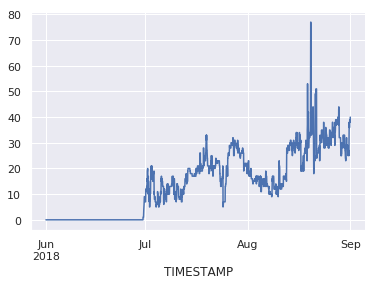

In [200]:
data2['active_deal_number'].plot()

In [201]:
df_connor = df[df.consumer_ID == "0x417c92FbD944b125A578848DE44a4FD9132E0911"]

In [202]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,0 days 00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,0 days 00:01:51,1.85
8,"{""deal"":{""id"":""3891""","""benchmarks"":{""values"":[108",1113,8,256000000,67108864,1000002,1000001,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.018698,19.778,3891,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-16 01:02:14,2018-08-16 03:18:59,0 days 02:16:45,136.75
16,"{""deal"":{""id"":""4704""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.142238,159.643,4704,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 21:22:34,2018-08-21 22:09:37,0 days 00:47:03,47.05
18,"{""deal"":{""id"":""2218""","""benchmarks"":{""values"":[111",1534,8,256000000,67108864,1000000,1000000,2,4281323520,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0De7409c558E34A64B9A200a38Dbd2677f69eaCf,0.063238,43.417,2218,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-24 15:23:46,2018-07-25 17:52:25,1 days 02:28:39,1588.65


In [203]:
def calclate_connor_deals(time_stamp):
    return len(df_connor[(df_connor.starttime<time_stamp) & (df_connor.endtime>time_stamp)])

In [204]:
data['connor_deal_number'] = data['TIMESTAMP'].apply(calclate_connor_deals)

In [205]:
data2 = data.set_index('TIMESTAMP')

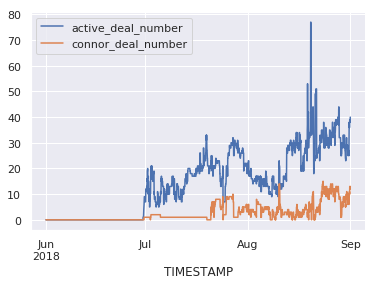

In [206]:
data2[['active_deal_number','connor_deal_number']].plot()

# calculate failed deal distribution

In [207]:
data.head()

,TIMESTAMP,TYPE,active_deal_number,connor_deal_number
0,2018-06-01 00:00:00,2,0,0
1,2018-06-01 01:00:00,0,0,0
2,2018-06-01 02:00:00,6,0,0
3,2018-06-01 03:00:00,1,0,0
4,2018-06-01 04:00:00,1,0,0


In [208]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
0,"{""deals"":[{""deal"":{""id"":""4698""","""benchmarks"":{""values"":[4009",1337,8,100000000,67108864,120,500,0,0,...,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,0xdEE7E9955b8e462bD661c692cd703F2911DD5C8b,0.000100,0.000,4698,0x24E192b02d33501f225580d6B19A8d97C5190D45,2018-08-21 17:25:49,2018-08-21 19:39:19,02:13:30,133.50
1,"{""deal"":{""id"":""720""","""benchmarks"":{""values"":[205",1170,2,256000000,67108864,1000000,1000001,2,3165650944,...,0x18CB84498d67635F14BA20A7A5DD9F8254bA5ecb,0xE0babb8aB2cE8845B68e32a87d33524edeFAed89,0.019963,31.458,720,0x24ceb5Ec6D7C58bD519974A6Ba76F50c953a4Bc3,2018-07-09 23:16:40,2018-07-09 23:17:37,00:00:57,0.95
2,"{""deal"":{""id"":""2""","""benchmarks"":{""values"":[2002",1102,2,2000000000,67108864,1000000,1000000,4,3163553792,...,0x517648Ec2E592969Ec344642034F079c52AfD025,0xd0f1C2dafde206D97e37325f1d3104711E8a620b,0.100000,79.806,2,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-06-30 09:15:34,2018-06-30 12:34:19,03:18:45,198.75
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,00:01:51,1.85


In [209]:
df_failed = df[df.duration_minutes <10]

In [210]:
df_successed = df[df.duration_minutes >10]

In [211]:
def calclate_failed_deals(time_stamp):
    return len(df_failed[(df_failed.starttime<time_stamp) & (df_failed.endtime>time_stamp)])

In [212]:
def calclate_successed_deals(time_stamp):
    return len(df_successed[(df_successed.starttime<time_stamp) & (df_successed.endtime>time_stamp)])

In [213]:
data['failed_deal_number'] = data['TIMESTAMP'].apply(calclate_failed_deals)

In [214]:
data['successed_deal_number'] = data['TIMESTAMP'].apply(calclate_successed_deals)

In [215]:
data2 = data.set_index('TIMESTAMP')

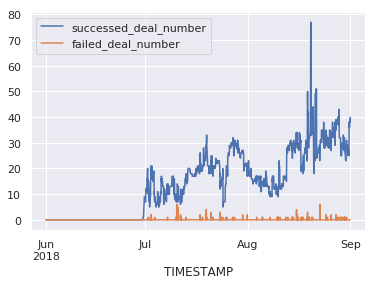

In [216]:
data2[['successed_deal_number','failed_deal_number']].plot()

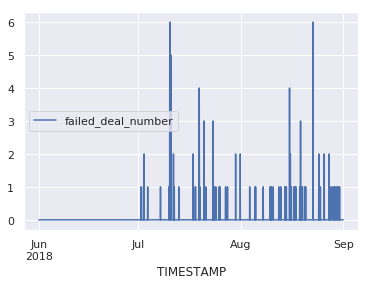

In [217]:
data2[['failed_deal_number']].plot()

# previously coded part

In [218]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe()

Ethash                          \
                                            count        mean         std   
master_ID                                                                   
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    1.0    0.000000         NaN   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4    1.0  172.350000         NaN   
0x25158E6f8dD683d222E3785BA2294A319489084E    1.0   22.179000         NaN   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f    1.0   12.220000         NaN   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    1.0    0.000000         NaN   
0x416Af57F633e292b25976573a460d7C3200feD34    3.0  159.752333   26.604168   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b    1.0   30.105000         NaN   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    3.0   26.442000   30.296063   
0x517648Ec2E592969Ec344642034F079c52AfD025    2.0   29.558500    4.094855   
0x61a2bB7A14177820F852afb95E3625b6A370079C    2.0    0.000000    0.000000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F    1.0   19.778000         NaN   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    1.0    0.000000         NaN   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01    1.0   21.959000         NaN   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    1.0    0.000000         NaN   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD    1.0  165.157000         NaN   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F    1.0  129.860000         NaN   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    1.0    0.000000         NaN   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F    1.0   64.894000         NaN   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d    2.0   21.711000    0.005657   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82    1.0   85.636000         NaN   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    2.0  109.769500  155.237516   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    6.0    0.000000    0.000000   

                                                                          \
                                                min        25%       50%   
master_ID                                                                  
0x1bC66B0374C997cF9CB087Ef184975f174c053b5    0.000    0.00000    0.0000   
0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4  172.350  172.35000  172.3500   
0x25158E6f8dD683d222E3785BA2294A319489084E   22.179   22.17900   22.1790   
0x29D518e8A3EEA4f92f6dB0FC8F52d8AA4721561f   12.220   12.22000   12.2200   
0x3C63D359D86E6165a2eBe911caA822d90e85432C    0.000    0.00000    0.0000   
0x416Af57F633e292b25976573a460d7C3200feD34  133.203  146.42300  159.6430   
0x424129085f9b7F0Cc07c47D077206d835a2A7B2b   30.105   30.10500   30.1050   
0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA    0.000    9.91350   19.8270   
0x517648Ec2E592969Ec344642034F079c52AfD025   26.663   28.11075   29.5585   
0x61a2bB7A14177820F852afb95E3625b6A370079C    0.000    0.00000    0.0000   
0x6F6B9a47668D96b3758D79c67c30A290934a759F   19.778   19.77800   19.7780   
0x87d341DF84A64b5289cf8A504F22cC10F509E9d6    0.000    0.00000    0.0000   
0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01   21.959   21.95900   21.9590   
0xB4214d064518eed303D966F9ca0Fc62Ac8dF20EE    0.000    0.00000    0.0000   
0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD  165.157  165.15700  165.1570   
0xE9a8A72Ea514D70479c0db2E971355D430Fd7a2F  129.860  129.86000  129.8600   
0xED629b767Ff4894E38a5a15c1F7233edBdFb6A32    0.000    0.00000    0.0000   
0xa90f716CF6ed3Bb999FE735B4C845b8DAf49672F   64.894   64.89400   64.8940   
0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d   21.707   21.70900   21.7110   
0xd44b2f0705E51ec2B4F3B5EE4b0961e5127fdF82   85.636   85.63600   85.6360   
0xedB7Ae4B946Cf249349974A02e354B5FBC577798    0.000   54.88475  109.7695   
0xf8D2b12c03f82EF61E106DE5dd691a30BA0419d3    0.000    0.00000    0.0000   

                                                               deal_ID  \
                                                  75%      max   count   
master_ID                                                           

In [219]:
len(df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])].groupby('master_ID').describe())

22

In [220]:
def calclate_unique_supplier(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('master_ID').describe())

In [221]:
calclate_unique_supplier(data['TIMESTAMP'][2000])

22

In [222]:
data['supplier_number'] = data['TIMESTAMP'].apply(calclate_unique_supplier)

In [223]:
data2 = data.set_index('TIMESTAMP')

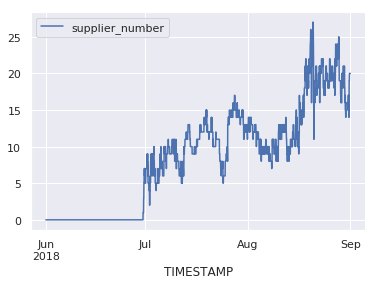

In [224]:
data2[['supplier_number']].plot()

In [225]:
def calclate_unique_consumer(time_stamp):
    return len(df[(df.starttime<time_stamp) & (df.endtime>time_stamp)].groupby('consumer_ID').describe())

In [226]:
data['consumerr_number'] = data['TIMESTAMP'].apply(calclate_unique_consumer)

In [227]:
data['consumer_number']= data['consumerr_number']

In [228]:
data2 = data.set_index('TIMESTAMP')

In [229]:
data2.head()

,TYPE,active_deal_number,connor_deal_number,failed_deal_number,successed_deal_number,supplier_number,consumerr_number,consumer_number
TIMESTAMP,,,,,,,,
2018-06-01 00:00:00,2,0,0,0,0,0,0,0
2018-06-01 01:00:00,0,0,0,0,0,0,0,0
2018-06-01 02:00:00,6,0,0,0,0,0,0,0
2018-06-01 03:00:00,1,0,0,0,0,0,0,0
2018-06-01 04:00:00,1,0,0,0,0,0,0,0


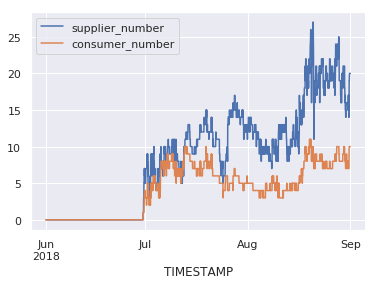

In [230]:
data2[['supplier_number','consumer_number']].plot()

In [231]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

1604.799

In [232]:
def calclate_Ethash(time_stamp):
    return df[(df.starttime<time_stamp) & (df.endtime>time_stamp)]['Ethash'].sum()

In [233]:
data['total_Ethash'] = data['TIMESTAMP'].apply(calclate_Ethash)

In [234]:
data2 = data.set_index('TIMESTAMP')

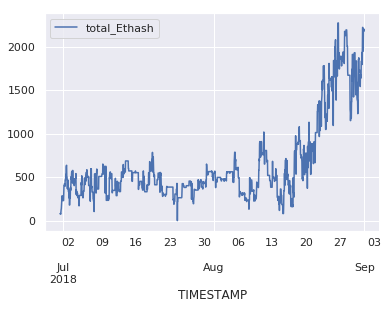

In [235]:
data2[['total_Ethash']].plot()

In [236]:
data['Ethash/deal'] = data['total_Ethash']/data['active_deal_number']

In [237]:
data2 = data.set_index('TIMESTAMP')

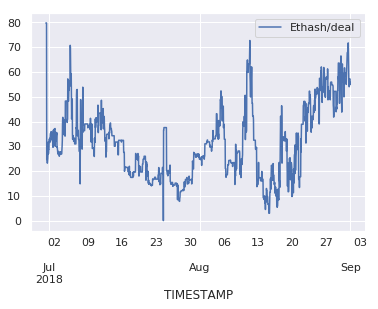

In [238]:
data2[['Ethash/deal']].plot()

In [239]:
data['Ethash/supplier'] = data['total_Ethash']/data['supplier_number']

In [240]:
data2 = data.set_index('TIMESTAMP')

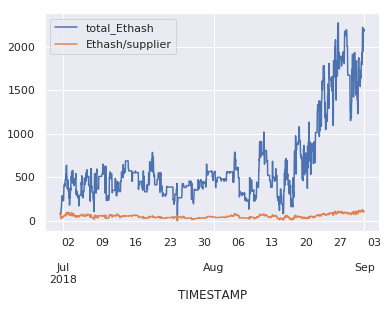

In [241]:
data2[['total_Ethash','Ethash/supplier']].plot()

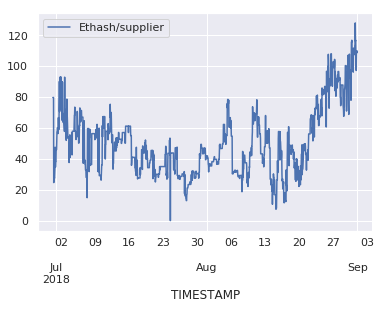

In [242]:
data2[['Ethash/supplier']].plot()

In [243]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes'].mean()/60

279.79290535433336

In [244]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

2983    80881.038064
3030      134.100000
3377       26.300000
3416    80890.289794
3426      134.150000
3551     3549.416667
3581      181.150000
3747     1198.850000
3754     3289.000000
3783     3919.300000
3822     2422.900000
3854      659.500000
3861     9974.900000
3886     4779.266667
4037     4146.983333
4069     3919.650000
4079     2983.166667
4164     2487.166667
4194     5117.666667
4338     5113.066667
4361     3565.916667
4366     4737.766667
4397    10051.166667
4401     4694.116667
4404    10087.216667
4975    13658.600000
5140    25165.430152
5201    15067.950000
5383    28115.131426
5547    75647.148825
5577    36176.348881
5584    36208.848968
5639    36208.349131
5672    36194.949456
5802    36178.299880
Name: duration_minutes, dtype: float64

In [245]:
def mean_duration(timestamp):
    return df[(df.starttime<timestamp) & (df.endtime>timestamp)]['duration_minutes'].mean()/60
    

In [246]:
mean_duration(data['TIMESTAMP'][2000])

279.79290535433336

In [247]:
data['mean_duration_hour']=data['TIMESTAMP'].apply(mean_duration)

In [248]:
data2 = data.set_index('TIMESTAMP')

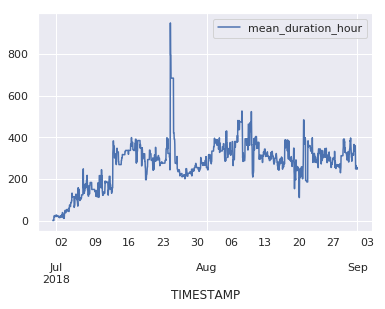

In [249]:
data2[['mean_duration_hour']].plot()

In [250]:
df[(df.starttime<data['TIMESTAMP'][2000]) & (df.endtime>data['TIMESTAMP'][2000])]['duration_minutes']

2983    80881.038064
3030      134.100000
3377       26.300000
3416    80890.289794
3426      134.150000
3551     3549.416667
3581      181.150000
3747     1198.850000
3754     3289.000000
3783     3919.300000
3822     2422.900000
3854      659.500000
3861     9974.900000
3886     4779.266667
4037     4146.983333
4069     3919.650000
4079     2983.166667
4164     2487.166667
4194     5117.666667
4338     5113.066667
4361     3565.916667
4366     4737.766667
4397    10051.166667
4401     4694.116667
4404    10087.216667
4975    13658.600000
5140    25165.430152
5201    15067.950000
5383    28115.131426
5547    75647.148825
5577    36176.348881
5584    36208.848968
5639    36208.349131
5672    36194.949456
5802    36178.299880
Name: duration_minutes, dtype: float64

# Connor time stamp and profitability

In [251]:
df_connor.head()

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
3,"{""deal"":{""id"":""3963""","""benchmarks"":{""values"":[109",1095,2,256000000,67108864,1000000,1000000,4,3165650944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x26200241593722FA17DE5722Ed66d8830dc58C6D,0.086650,93.131,3963,0xedB7Ae4B946Cf249349974A02e354B5FBC577798,2018-08-17 03:21:17,2018-08-17 03:26:26,0 days 00:05:09,5.15
4,"{""deal"":{""id"":""4342""","""benchmarks"":{""values"":[103",1300,4,256000000,67108864,1000000,1000000,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x1E575FB7dD8b28CEcAD9065A7aFD1aC6c2fBA797,0.020140,21.959,4342,0xAAA932d77935EE3d8E0Ba1d464CFDA4E56566A01,2018-08-19 02:56:02,2018-08-19 02:57:53,0 days 00:01:51,1.85
8,"{""deal"":{""id"":""3891""","""benchmarks"":{""values"":[108",1113,8,256000000,67108864,1000002,1000001,1,6368002048,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x734C2a165e57496169aAAEA6E22aE763fF8d7654,0.018698,19.778,3891,0x6F6B9a47668D96b3758D79c67c30A290934a759F,2018-08-16 01:02:14,2018-08-16 03:18:59,0 days 02:16:45,136.75
16,"{""deal"":{""id"":""4704""","""benchmarks"":{""values"":[103",1300,2,512000000,67108864,1000001,1000000,6,8511291392,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xd8B606a3D19C53E6Eea84ca5738D7D7d2c0eeb5f,0.142238,159.643,4704,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-21 21:22:34,2018-08-21 22:09:37,0 days 00:47:03,47.05
18,"{""deal"":{""id"":""2218""","""benchmarks"":{""values"":[111",1534,8,256000000,67108864,1000000,1000000,2,4281323520,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x0De7409c558E34A64B9A200a38Dbd2677f69eaCf,0.063238,43.417,2218,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-07-24 15:23:46,2018-07-25 17:52:25,1 days 02:28:39,1588.65


In [254]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]

,0,1,2,3,4,5,6,7,8,9,...,consumer_ID,supplier_ID,price_USD/h,Ethash,deal_ID,master_ID,starttime,endtime,duration,duration_minutes
3030,"{""deal"":{""id"":""4879""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,3,6372196352,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.050831,59.499,4879,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:52,2018-08-23 08:42:58,0 days 02:14:06,134.100000
3377,"{""deal"":{""id"":""4883""","""benchmarks"":{""values"":[103",1288,2,512000000,67108864,1000000,1000000,6,8152825856,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x7C339f2cfeeDFDB1748a15E466F6bbC49770B48A,0.147143,165.157,4883,0xE0E924b23852b7a4cEA3183dBaC056af8Bf70BBD,2018-08-23 07:58:52,2018-08-23 08:25:10,0 days 00:26:18,26.300000
3426,"{""deal"":{""id"":""4878""","""benchmarks"":{""values"":[104",1949,16,512000000,67108864,1000001,1000000,1,6373244928,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xA0885038D127f628B3DC7f406004dE104d0bF496,0.017390,19.827,4878,0x4e452D1EB085A15d3f9544Ffedf9F82e92017EFA,2018-08-23 06:28:28,2018-08-23 08:42:37,0 days 02:14:09,134.150000
3551,"{""deal"":{""id"":""4836""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,11718885376,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.028091,32.454,4836,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:13,2018-08-25 08:24:38,2 days 11:09:25,3549.416667
3854,"{""deal"":{""id"":""4875""","""benchmarks"":{""values"":[108",1094,2,512000000,67108864,1000000,1000000,6,8507097088,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x38B904701577720d4Eb06b5d28A7bd02a443711F,0.150264,172.350,4875,0x24Ef1f9fD894e5CBd9EbFCa5F66230F060De65C4,2018-08-23 04:07:49,2018-08-23 15:07:19,0 days 10:59:30,659.500000
3886,"{""deal"":{""id"":""4830""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.715,4830,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 21:04:13,2018-08-26 04:43:29,3 days 07:39:16,4779.266667
4079,"{""deal"":{""id"":""4881""","""benchmarks"":{""values"":[104",1062,4,512000000,67108864,1000000,1000000,1,8512339968,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x2f1B94E3813d66967a478031889F230D805130Ec,0.025210,30.105,4881,0x424129085f9b7F0Cc07c47D077206d835a2A7B2b,2018-08-23 06:39:40,2018-08-25 08:22:50,2 days 01:43:10,2983.166667
4164,"{""deal"":{""id"":""4874""","""benchmarks"":{""values"":[104",1301,2,512000000,67108864,1000000,1000000,5,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x10B3Fe7B225b9fF0294CAa76d5d9F8514Cd3d7B9,0.115931,133.203,4874,0x416Af57F633e292b25976573a460d7C3200feD34,2018-08-23 04:05:13,2018-08-24 21:32:23,1 days 17:27:10,2487.166667
4361,"{""deal"":{""id"":""4818""","""benchmarks"":{""values"":[109",1522,8,512000000,67108864,1000000,1000000,1,4292050944,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0x33f81Ee6f9d4716B1C13bA58FdAE5a1fa9f995d2,0.018727,21.707,4818,0xb95b73D95bee11038Bab90cf2cc15985E2F9be4d,2018-08-22 20:57:13,2018-08-25 08:23:08,2 days 11:25:55,3565.916667
4366,"{""deal"":{""id"":""4837""","""benchmarks"":{""values"":[114",1525,4,512000000,67108864,1000000,1000000,1,8513388544,...,0x417c92FbD944b125A578848DE44a4FD9132E0911,0xC1bf17F560FA5BF79aF72B4314d14706b90ad2cE,0.023186,26.663,4837,0x517648Ec2E592969Ec344642034F079c52AfD025,2018-08-22 21:15:43,2018-08-26 04:13:29,3 days 06:57:46,4737.766667


In [255]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

702.45799999999997

In [256]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()

0.61288928999999981

In [257]:
df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['price_USD/h'].sum()/df_connor[(df_connor.starttime<data['TIMESTAMP'][2000]) & (df_connor.endtime>data['TIMESTAMP'][2000])]['Ethash'].sum()

0.00087249243371133908

In [258]:
def profitability(timestamp):
    ethash = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['Ethash'].sum()
    price = df_connor[(df_connor.starttime<timestamp) & (df_connor.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [260]:
profitability(data['TIMESTAMP'][2000])

0.00087249243371133908

In [267]:
data['profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability)

In [268]:
data2 = data.set_index('TIMESTAMP')

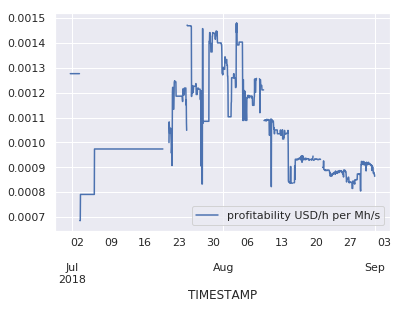

In [269]:
data2[['profitability USD/h per Mh/s']].plot()

In [270]:
data2.iloc[2000]

TYPE                               3.000000
active_deal_number                35.000000
connor_deal_number                11.000000
failed_deal_number                 0.000000
successed_deal_number             35.000000
supplier_number                   22.000000
consumerr_number                   9.000000
consumer_number                    9.000000
total_Ethash                    1604.799000
Ethash/deal                       45.851400
Ethash/supplier                   72.945409
mean_duration_hour               279.792905
profitability USD/h per Mh/s       0.000872
Name: 2018-08-23 08:00:00, dtype: float64

In [272]:
def profitability_total(timestamp):
    ethash = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['Ethash'].sum()
    price = df[(df.starttime<timestamp) & (df.endtime>timestamp)]['price_USD/h'].sum()
    return price/ethash

In [273]:
data['total_profitability USD/h per Mh/s']=data['TIMESTAMP'].apply(profitability_total)

In [274]:
data2 = data.set_index('TIMESTAMP')

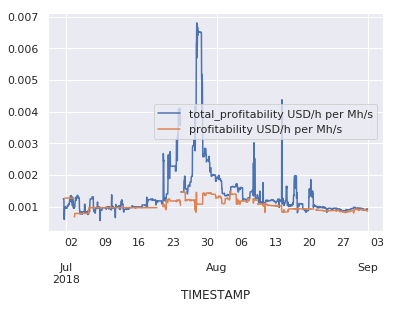

In [275]:
data2[['total_profitability USD/h per Mh/s','profitability USD/h per Mh/s']].plot()

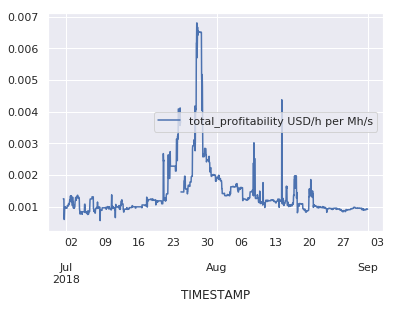

In [276]:
data2[['total_profitability USD/h per Mh/s']].plot()